<a href="https://colab.research.google.com/github/Deekshitha62/gradient_descent/blob/main/GRADIENT_DESCENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)
np.random.seed(42)

In [ ]:
def eval_secondDegree(coeffs,x):
    a=coeffs[0]*(x*x)
    b=coeffs[1]*x
    c=coeffs[2]
    y=a+b+c
    return y
hundred_xs=np.random.uniform(-10,10,100)
coeffs=[1,0,0]
xs=[]
ys=[]
for x in hundred_xs:
    y=eval_secondDegree(coeffs,x)
    xs.append(x)
    ys.append(y)

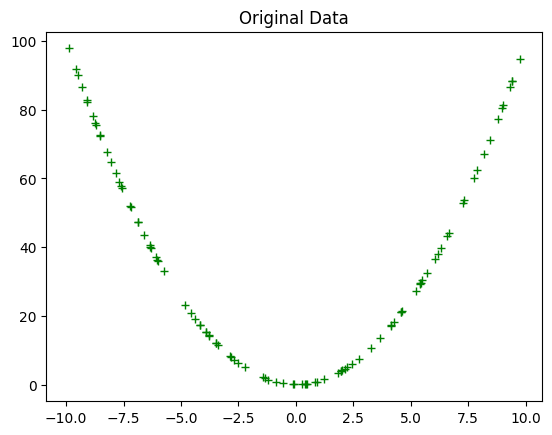

In [ ]:
plt.plot(xs,ys,'g+')
plt.title('Original Data')
plt.show()

In [ ]:
def eval_secondDegree_jitter(coeffs,x,j):
    a=coeffs[0]*(x*x)
    b=coeffs[1]*x
    c=coeffs[2]
    y=a+b+c
    interval=[y-j,y+j]
    interval_min=interval[0]
    interval_max=interval[1]
    jit_val=random.random()*interval_max
    while jit_val<interval_min:
        jit_val=random.random()*interval_max
    return jit_val
xs=[]
ys=[]
for x in hundred_xs:
  y=eval_secondDegree_jitter(coeffs,x,0.1)
  xs.append(x)
  ys.append(y)


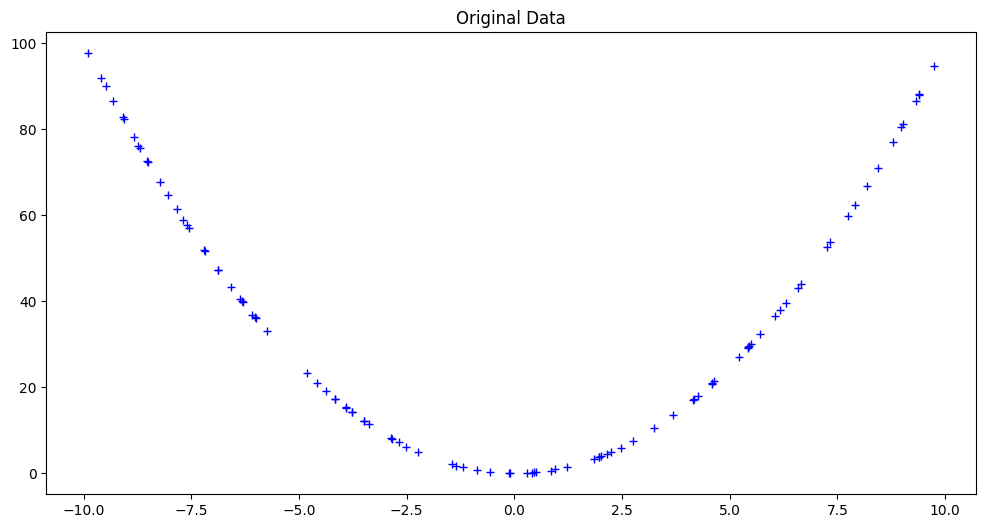

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'b+')
plt.title('Original Data')
plt.show()

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

<function matplotlib.pyplot.show(close=None, block=None)>

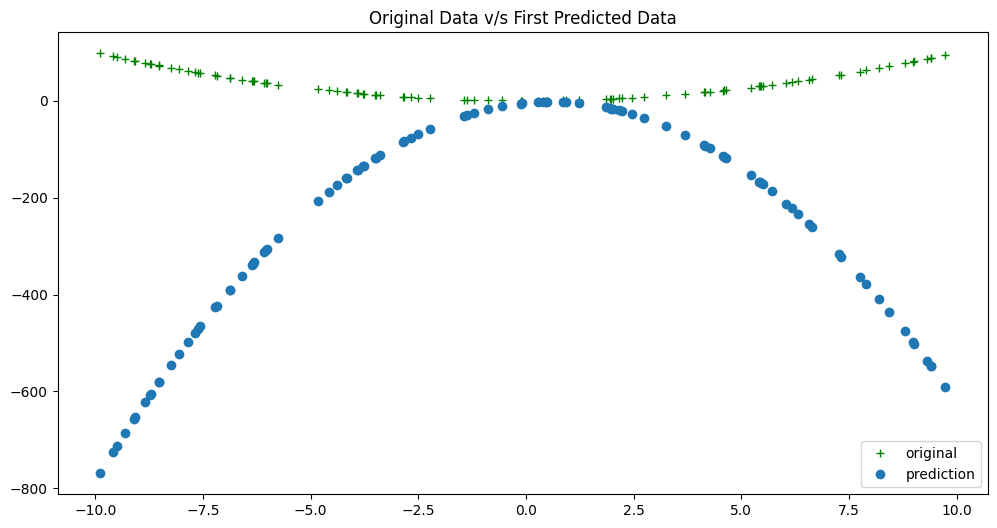

In [ ]:
rand_coeffs=(random.randrange(-10,10),random.randrange(-10,10),random.randrange(-10,10))
y_bar=eval_secondDegree(rand_coeffs,hundred_xs)
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'g+',label='original')
plt.plot(xs,y_bar,'o',label='prediction')
plt.title('Original Data v/s First Predicted Data')
plt.legend(loc="lower right")
plt.show

In [ ]:
initial_model_loss=mse_loss(ys,y_bar)
initial_model_loss

NameError: name 'mse_loss' is not defined

In [ ]:
def calc_gradient_secondDegree(rand_coeffs,hundred_xs,ys):
    a_s =[]
    b_s =[]
    c_s =[]
    y_bars=eval_secondDegree(rand_coeffs,hundred_xs)
    for x,y,y_bar in list(zip(hundred_xs,ys,y_bars)):
        x_squared=x**2
        partial_a=x_squared*(y-y_bar)
        a_s.append(partial_a)
        partial_b=x*(y-y_bar)
        b_s.append(partial_b)
        partial_c=(y-y_bar)
        c_s.append(partial_c)
    num=[i for i in y_bars]
    n=len(num)
    gradient_a=(-2/n)*sum(a_s)
    gradient_b=(-2/n)*sum(b_s)
    gradient_c=(-2/n)*sum(c_s)
    return (gradient_a,gradient_b,gradient_c)

In [ ]:
calc_grad=calc_gradient_secondDegree(rand_coeffs,hundred_xs,ys)
lr=0.0001
a_new=rand_coeffs[0]-lr*calc_grad[0]
b_new=rand_coeffs[1]-lr*calc_grad[1]
c_new=rand_coeffs[2]-lr*calc_grad[2]
new_model_coeffs=(a_new,b_new,c_new)
print(f"New model coefficients are: {new_model_coeffs}")
new_y_bar=eval_secondDegree(new_model_coeffs,hundred_xs)
updated_model_loss=mse_loss(ys,new_y_bar)
print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'g+',label='original')
plt.plot(xs,y_bar,'ro',label='first prediction')
plt.plot(xs,new_y_bar,'b.',label='updated prediction')
plt.title("Original v/s First Prediction v/s Updated Prediction with lower loss")
plt.legend(loc="lower right")
plt.show()

In [ ]:
def calc_gradient_secondDegree_for_GD(coeffs, inputs_x, outputs_y, lr):
    a_s=[]
    b_s=[]
    c_s=[]
    y_bars=eval_secondDegree(coeffs,inputs_x)
    for x,y,y_bar in list(zip(inputs_x,outputs_y,y_bars)):
        x_squared=x**2
        partial_a=x_squared*(y-y_bar)
        a_s.append(partial_a)
        partial_b=x*(y-y_bar)
        b_s.append(partial_b)
        partial_c=(y-y_bar)
        c_s.append(partial_c)
    num=[i for i in y_bars]
    n=len(num)
    gradient_a=(-2/n)*sum(a_s)
    gradient_b=(-2/n)*sum(b_s)
    gradient_c=(-2/n)*sum(c_s)
    a_new=coeffs[0]-lr*gradient_a
    b_new=coeffs[1]-lr*gradient_b
    c_new=coeffs[2]-lr*gradient_c
    new_model_coeffs=(a_new,b_new,c_new)
    new_y_bar=eval_secondDegree(new_model_coeffs, inputs_x)
    updated_model_loss=mse_loss(outputs_y,new_y_bar)
    return (updated_model_loss,new_model_coeffs,new_y_bar)

In [ ]:
def gradient_descent(epochs,lr):
    losses=[]
    rand_coeffs_to_test=rand_coeffs
    for i in  range(epochs):
        loss=calc_gradient_secondDegree_for_GD(rand_coeffs_to_test,hundred_xs,ys,lr)
        rand_coeffs_to_test=loss[1]
        losses.append(loss[0])
    print(losses)
    # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)
    return loss[0], loss[1], loss[2], losses

In [ ]:
GD=gradient_descent(30000,0.0003)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'g+',label='original')
plt.plot(xs,GD[2],'b.',label='final_prediction')
plt.title('Orginal vs Final Prediction after Gradient Descent')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(GD[3],'b-',label='loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()